# RMS PROJECT 

**DEEPAK BOGATI 6066481**

# 1. INTRODUCTION

Nepal is a landlocked country in Southern Asia surrounded by two of the fastest growing countries of the world. China in the North and India in the other three directions. Foreign trade plays a major role in economic development of any country. Land locked Nepal has no direct asceses to the sea. Indian port of Calcutta is the nearest port at 710 km from the nearest border of Nepal. Even construction of Kodari road only gave the effective asceses to Tibetan market and connection to nearest port via Chinese land was still an enormous distance to be traveled.  This made Indian city of Calcutta only visible port of economic asceses to the rest of the world. 1950s Indo-Nepal Trade Treaty gave Nepal a full and unrestricted right to commercial transit of all the goods and manufacturers through the territory and ports of India.

India’s Exports to Nepal was 5.85 Billion dollors during 2019-2020, says United Nations COMTRADE database on international trade. That is  60 % of total import Nepal made in that year. On the other hand, World Bank estimates $9.2 billion worth of export potential in Nepal. Out of which Nepal only managed to export less then 10%. around 60% of total export is made to India. Therefore, I believe the tendency of overall economy of these two nations is directly dependent to each other’s GDP. Apart from these two variables I consider educational attainment to be a prominent factor that influence the GDP.

Robert J. Barro mentioned education, health, and aspects of social capital to be the major determinant of economic growth in his famous publication “Education as a Determinant of Economic Growth”
Therefore, multiple regression analysis is performed with the above-mentioned variables. Main focus was on Nepali GDP as a function of educational attainment and the way it fluctuates over time.

# 1.1 GDP of Nepal
The objective of this paper is to explore variables influencing GDP of Nepal with a linear regression equation, using the Ordinary Least Squares (OLS) estimator. Understanding the relation between GDP(Nepal), GDP(India), Education index(Nepal) and level of their dependencies.

# 2. DATA

Source of Data was the official web service provided and maintained by international monetary fund itself.  It was a simple excel data which was further cleaned and verified form other sources like World Bank, UN COMTRADE.  To get the best possible analysis, data form past 32 years, (1990 to 2021) are used.

Dependent Variable: (Y) GDP of Nepal.

Explanatory variables: (X1) Educational attainment in Nepal & (X2) GDP of India.

**Units:**

Dependent variable: GDP per capita of Nepal (PCNP) is gross domestic product divided by midyear population. Measured in USD/person/year

Explanatory variables: Gross domestic product of india, abbreviated as (GDPI), is a basic measure of the overall size of a country's economy. Measured in Millions USD/year for this project. Education index for Nepal (EDUI) is measured by combining average adult years of schooling with expected years of schooling for students under the age of 25, For this project it has be converted to the multiple of 1000 for better plot of the data and understanding of relative data plot.


In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

# 3. The Regression Equation and Expectations:
**The regression equation reads like this:**

                       𝑌=𝛽0+𝛽1𝑋1+𝛽2𝑋2+𝜀

Dependent Variable(Y) is the GDP percapita of Nepal.
Explanatory variables
(X1) is the Educational attainment in Nepal & 
(X2) is the GDP of India.      


𝛽0, 𝛽1, 𝛽2 are the coefficients.

**Hypothesis:**    Indian and Nepalese GDPs are directly proportional to each other. Increase in GDP of Nepal is influenced by the rise of Indian GDP and vice versa. Also, Educational attainment in Nepal is positively influenced by the GDP. “Education is the major determinant of Economic growth” - Robert J. Barro. Therefore, I expect the coefficient on Educational attainment in Nepal (𝛽1) and  and the coefficient on GDP of India (𝛽2) to have a positive sign. i.e that both of these variables have a positive impact on the dependent variable.

**Null-Hypothesis:**   There is no correlation between Nepalese GDP, Indian GDP and Education index of Nepal mentioned above. 




# 4. Reading dataset

In [4]:
df = pd.read_excel('Dataframe.xlsx')

column_name = {'Percapita NP' : 'PCNP', 'EDU Index' : 'EDUI', 'GDP IN' : 'GDPI'}# changing the column details
df = df.rename(columns = column_name)
df.head()

,Year,PCNP,EDUI,GDPI
0,1990,235.34,0.276,326.34
1,1991,251.44,0.283,274.23
2,1992,222.54,0.291,293.23
3,1993,232.12,0.293,284.19
4,1994,235.22,0.295,333.01


# 5. Scatter plot of the data
# 5.1 Y vs X1


In [6]:
plt.style.use('seaborn')

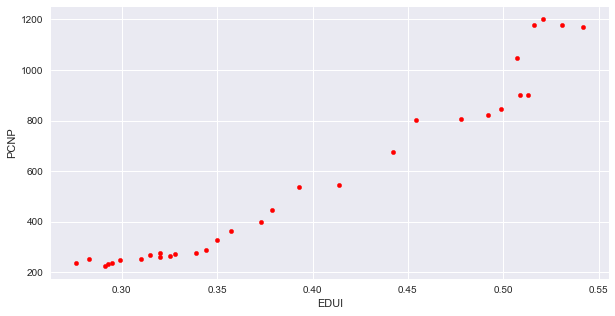

In [7]:
df.plot(y = 'PCNP', x = 'EDUI', kind = 'scatter', c = 'r', figsize =(10,5))
plt.show()

In [8]:
#import statsmodels.formula.api as smf 
#regres='PCNP~EDUI'
#reg1=smf.ols(regres,df).fit()
#print(reg1.summary())

**Scatter diagram of the data Y against X1. That is percapita GDP of Nepal with Education index of nepal.** 

The plot shows a fairly strong positive relationship between percapita income of nepal with that of education index.It also verifies that, plot shows the high level of acceptance as described in the assumption/hypothesis.It shows a steady positive relation.

Hence We can write our model as: 

**Percapita income of Nepal =  β₀ + β₁EDU Index + e**

Where,

**β₀ is intercept of the linear trend line on the y-axis**

**β₁ is the slope of the linear trend line.**

**e  error term.**


# 5.2 Y vs X2

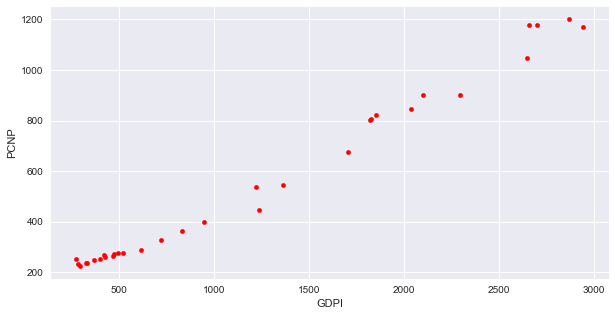

In [8]:
df.plot(y='PCNP', x='GDPI', kind='scatter', c = 'r', figsize =(10,5))
plt.show()

In [13]:
#import statsmodels.formula.api as smf 
#regres='PCNP~GDPI'
#reg2=smf.ols(regres,df).fit()
#print(reg2.summary())


From 1990 to 2021

**Scatter diagram of the data Y against X2. That is percapita of Nepal with GDP of India** 

The plot shows a fairly strong positive relationship between percapita income of nepal with that of education index.Plot is almost a stright line. This proves the high degree of depencency of the indian economy with that of nepal.

Hence We can write our model as: 

**Percapita NP = β₀ + β₁GDP IN + e** 

Where, 

**β₀ is intercept of the linear trend line on the y-axis** 

**β₁ is the slope of the linear trend line.** 

**e error term.**

# 5.3 X1 vs X2

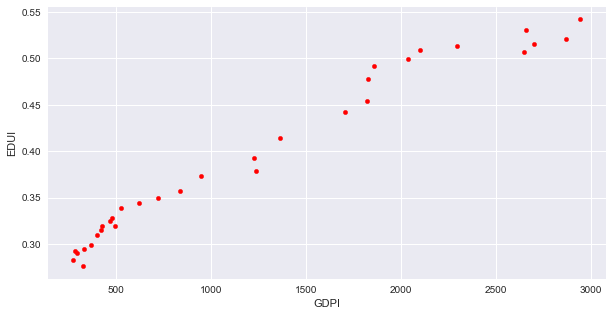

In [10]:
df.plot(y='EDUI', x='GDPI', kind='scatter', c='r', figsize =(10,5))
plt.show()

In [15]:
#import statsmodels.formula.api as smf 
#regres='EDUI~GDPI'
#reg3=smf.ols(regres,df).fit()
#print(reg3.summary())

**Plot shows the similar relation to as shown by in the first plot.**

Plot is almost a stright line. this provides the high degree of depencency of Education index with that of Indian GDP.   

Hence We can write our model as: 

**EDU Index = β₀ + β₁GDP NP + e** 

Where, 

**β₀ is intercept of the linear trend line on the y-axis** 

**β₁ is the slope of the linear trend line.**

**e error term.**


# 5.4  Possible Collinearity of the Regressors?

In [28]:
df.PCNP.corr(df.EDUI)

0.9729694990713432

In [31]:
df.PCNP.corr(df.GDPI)

0.9927024947565707

In [32]:
df.GDPI.corr(df.EDUI)

0.9824475537042303

For above mentioned relatioins, i.e Y against X1, Y against X2 and X1 against X2 it is seen that they have high degree of collinearity. This can lead to large standard errors which in return causes small t-statistics.

 # 6. Running the Regression with OLS, Interpreting the Results:


# 6.1 Regressing Percapita of Nepal(Y) with Edu Index(X1)

Y = Percapita of Nepal

X1 = Edu index (Nepal)

General equation looks like : Y = B0 + B1X1 + e

In [35]:
import statsmodels.formula.api as smf 
regres='PCNP~EDUI'
regout=smf.ols(regres,df).fit()
print(regout.summary())

                            OLS Regression Results                            
Dep. Variable:                   PCNP   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     532.5
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.19e-20
Time:                        19:27:04   Log-Likelihood:                -185.18
No. Observations:                  32   AIC:                             374.4
Df Residuals:                      30   BIC:                             377.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -913.9840     65.236    -14.010      0.0

In [36]:
regout.params

Intercept    -913.983975
EDUI         3726.593211
dtype: float64

As expected, the coefficient of the regressor "Education Index in Nepal" is positive. It is also statistically significant at the 99% level (with the probability for the t-statistic being -14.010. The F-Statistic shows significance at this level, too. The adjusted R-squared is quite high with 0.947.

**Final Equation for first regression**

**Y = -913.984 + 3726.593X1 + e**

# 6.2. Regressing Percapita of Nepal(Y) with Edu Index(X1) and GDP of India(X2)

**Regressing Percapita of Nepal(Y) with Edu Index(X1) and GDP of India(X2)**

y = Percapita of Nepal

x1 = Edu index (Nepal)

x2 = GDP India 

**Y = B0 + B1X1 +B2X2 + e**


In [46]:
import statsmodels.formula.api as smf 
regres='PCNP~EDUI+GDPI'
regout2=smf.ols(regres,df).fit()
print(regout2.summary())

                            OLS Regression Results                            
Dep. Variable:                   PCNP   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     993.2
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           1.96e-27
Time:                        23:44:19   Log-Likelihood:                -164.22
No. Observations:                  32   AIC:                             334.4
Df Residuals:                      29   BIC:                             338.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.9030    125.803      1.255      0.2

In [56]:
print("Parameters: ", 
      regout2.params)
print("R2: ", regout2.rsquared)


Parameters:  Intercept    157.903030
EDUI        -254.114431
GDPI           0.402068
dtype: float64
R2:  0.9856114126656744


In [40]:
print("Standard errors: ", regout.bse)

Standard errors:  Intercept     65.236109
EDUI         161.487670
dtype: float64


**Final Equation for Second regression**

**Y = 157.903 - 254.113.X1 + 0.402.X2 + e**


In [3]:
1/(1-.98)

49.99999999999996

In [4]:
1/(1-.947)

18.86792452830187

# 7. Summary and Outlook

This project is basically a linear regression analysis on GDP of Nepal as a function of Educational attainment and GDP of bordered country (india). Data was attained from  international monetary fund and varified from other sources. Both the regressor variables i.e Educational index of nepal and GDP of India were expected to have positive impact on GDP of nepal. OLS regression result confirms this anticipation. High degree of correlation is seen beeween independent variables (EDUI and GDPI). it can be seen from the above multiple regression analysis that GDP of nepal is directly porportional with the Educational attainment of Nepal and GDP of india.

With these linear regression equations, we can better understand the determinants and its direct as well as indirect influences on GDP. These equation can be helpful in documentation and estimation of projects that are influenced by these factors.Goverment as well as private institutions can analyse these independencies to predict the possible outcome from a planed projects. Example: Estimated Budget on education for the year 2030 can be a resourceful information for the finance department to plan and execute the generation of the fund. 

**Discussion**

**Multiple R** is the value that tells how strong is the relation between two variables. above solution indicates that it gives an unpredictiable but steady relationship.

**P-value** is relatively small indicating the insignificant of the regression model.

**Coefficient of determination r-squared** tells us how much variance the dependent variable can be accounted for by independent variable.

**Adjusted R square** takes into account the number of independent variables in the analysis and corrects for bias.

**standard error** is the average distance that the observed value fall from the regression line.

**Equations**

**Y1 = -913.984 + 3726.593X1 + e**

**Y2 = 157.903 - 254.113.X1 + 0.402.X2 + e**

Here we can see that the sign of X1 changes to -ve when second regressor is introdeuced. This is because of the Multicollinearity.Two or more predictors are strongly corelated and hence effect of individual cannot be seperated and regresson modle becomes unstable.

The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. one might not be able to trust the p-values to identify independent variables that are statistically significant.


so we check for (variance inflation factor) **VIF = 1/(1-r^2)**

As (VIF > 10) for both the equation, and hence general regression model cannot be trusted. But in this research topic Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics.

**Therefore above equations can be well used for the prediction purpose**

# 8. Bibliography

https://mea.gov.in/bilateral-documents.htm?dtl/6291/Treaty

https://www.britannica.com/place/Nepal/Economy

Liu Kui’s “The Interactive Causality between Education and Economic Growth in China” 

Robert J. Barro “Education as a Determinant of Economic Growth”

https://stats.stackexchange.com/questions/1580/regression-coefficients-that-flip-sign-after-including-other-predictors 

https://www.imf.org
